In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("presence_1_0_par_patch.csv", index_col=0)
df.head()

,patchID,dayOfYear,lon,lat,x_EPSG3035,y_EPSG3035,year,dataset,geoUncertaintyInM,bio1,...,3875,8547,7915,6730,3701,223,937,9546,9456,6081
0,55880,126,4.74408,44.2037,3900369.0,2358486.0,2020,CBNMed,10.0,2878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55897,126,4.74436,44.2041,3900395.0,2358529.0,2020,CBNMed,10.0,2878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55942,126,4.74519,44.2036,3900457.0,2358469.0,2020,CBNMed,10.0,2878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56533,126,4.75466,44.2193,3901329.0,2360153.0,2020,CBNMed,10.0,2876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56759,126,4.75755,44.2136,3901518.0,2359506.0,2020,CBNMed,10.0,2877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
variables = df.iloc[:, 9:37]
especes = df.iloc[:, 48:]
variables.head()

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio19,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
0,2878,95,3.33,6635,3032,2747,285,2880,2967,2967,...,1559,142.439041,192.611618,173.934845,244.970306,184.283295,75.167183,379.648071,374.968933,226.862244
1,2878,95,3.33,6635,3032,2747,285,2880,2967,2967,...,1559,142.439041,192.611618,173.934845,244.970306,184.283295,75.167183,379.648071,374.968933,226.862244
2,2878,95,3.33,6635,3032,2747,285,2880,2967,2967,...,1559,142.439041,192.611618,173.934845,244.970306,184.283295,75.167183,379.648071,374.968933,226.862244
3,2876,95,3.33,6614,3031,2746,285,2879,2965,2965,...,1603,139.343964,201.281235,184.239105,223.070511,221.730957,73.108734,378.273560,398.929901,255.015320
4,2877,95,3.33,6635,3031,2746,285,2879,2966,2966,...,1586,145.295364,195.884705,171.115875,234.305283,195.522888,74.028191,382.905090,382.355530,241.613922


In [4]:
variables = variables.fillna(variables.mean())

In [5]:
pca = PCA()
pca.fit(variables)
n = np.sum(np.cumsum(pca.explained_variance_ratio_)<=0.999)
print(np.cumsum(pca.explained_variance_ratio_))

pca = PCA(n_components = n)
pca.fit(variables)

variables_transformed = pca.fit_transform(variables)

# Afficher le nombre de composantes nécessaires et les données transformées
df_transformed = pd.DataFrame(variables_transformed, columns=[f'PC{i}' for i in range(1, n+1)])
df_transformed.head()

[0.89853283 0.95161318 0.98515105 0.99369365 0.99720536 0.99808292
 0.99884303 0.99927198 0.99944867 0.99959527 0.99971513 0.99978769
 0.99984809 0.99989434 0.99992655 0.99995772 0.9999817  0.99999078
 0.99999603 0.99999879 0.99999957 0.99999989 0.99999998 0.99999999
 1.         1.         1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2463.874162,-1393.586881,-227.623900,296.089144,306.835712,7.749729,-6.698961
1,-2463.874162,-1393.586881,-227.623900,296.089144,306.835712,7.749729,-6.698961
2,-2463.874162,-1393.586881,-227.623900,296.089144,306.835712,7.749729,-6.698961
3,-2180.487609,-1381.070348,-209.935561,301.470579,339.565822,18.255757,-25.611224
4,-2283.014239,-1400.453927,-213.109104,298.570731,327.135558,7.243898,-13.959403


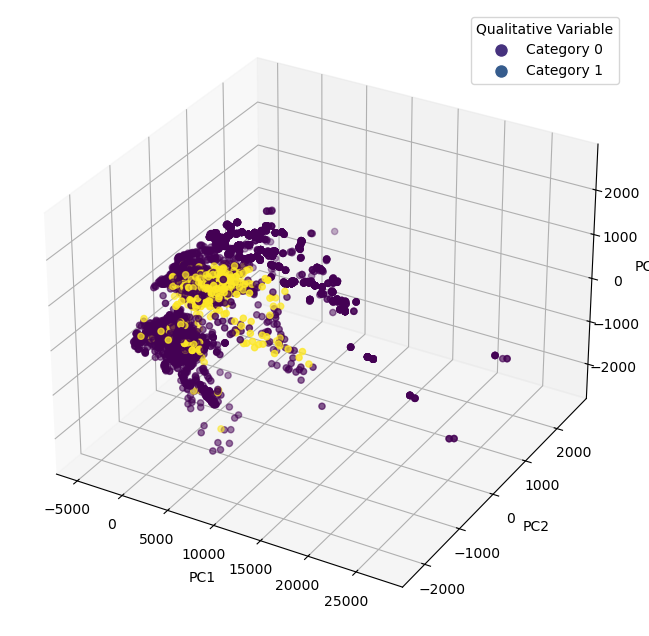

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot avec coloration en fonction de la variable qualitative
scatter = ax.scatter(df_transformed['PC1'], df_transformed['PC2'], df_transformed['PC3'], c=especes['6574'], cmap='viridis')

# Légende
legend_labels = {0: 'Present', 1: 'Absent'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('viridis')[i], markersize=10, label=legend_labels[i]) for i in range(2)]
ax.legend(handles=legend_handles, title='Presence', loc='upper right')

# Ajouter des étiquettes aux axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Afficher le plot
plt.show()

In [9]:


# Supposons que vous avez déjà votre DataFrame avec les données transformées 'df_plot'
# et que la variable à prédire est 'Qualitative_Variable'
# df_plot = ...
# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(df_transformed[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']], especes[especes.columns[1]], test_size=0.2, random_state=42)

# Instanciation du modèle SVM
svm_model = SVC(kernel='poly', degree=3, C=1)  # Vous pouvez ajuster le noyau en fonction de votre problème

# Entraînement du modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predictions = svm_model.predict(X_test)

# Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle SVM : {accuracy * 100:.2f}%")

#new_prediction = svm_model.predict(new_data)
#print(f"Prédiction pour le nouveau point : {new_prediction}")


Précision du modèle SVM : 100.00%


In [21]:
print("Rapport de classification :")
print(classification_report(y_test, predictions))

Rapport de classification :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1044

    accuracy                           1.00      1044
   macro avg       1.00      1.00      1.00      1044
weighted avg       1.00      1.00      1.00      1044



In [6]:
data_test = pd.read_csv("enviroTab_pa_test.csv", sep=";", index_col="Id")
bio_test = data_test.iloc[:, 9:37]
bio_test.head()

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio19,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
Id,,,,,,,,,,,,,,,,,,,,,
1,2732,94,3.48,6333,2876,2605,271,2751,2664,2816,...,2819,111.659973,246.265289,208.874542,198.631241,549.32196,59.000000,391.495422,410.591125,560.965332
2,2732,94,3.48,6333,2876,2605,271,2751,2664,2816,...,2819,111.659973,246.265289,208.874542,198.631241,549.32196,59.000000,391.495422,410.591125,560.965332
3,2732,94,3.48,6333,2876,2605,271,2751,2664,2816,...,2819,111.659973,246.265289,208.874542,198.631241,549.32196,59.000000,391.495422,410.591125,560.965332
4,2732,94,3.48,6333,2876,2605,271,2751,2664,2816,...,2819,111.659973,246.265289,208.874542,198.631241,549.32196,59.000000,391.495422,410.591125,560.965332
5,2753,93,3.51,6175,2894,2628,266,2772,2687,2835,...,2076,108.531036,239.170151,158.518951,203.673767,526.69397,59.955669,356.640228,439.434357,797.692505


In [7]:
bio_acp = pca.transform(bio_test)
bio_acp = pd.DataFrame(bio_acp, columns=[f'PC{i}' for i in range(1, n+1)])
bio_acp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3781.122555,-1214.677309,1095.988145,266.150422,622.768695,157.004477,244.136676
1,3781.122555,-1214.677309,1095.988145,266.150422,622.768695,157.004477,244.136676
2,3781.122555,-1214.677309,1095.988145,266.150422,622.768695,157.004477,244.136676
3,3781.122555,-1214.677309,1095.988145,266.150422,622.768695,157.004477,244.136676
4,-603.016275,-691.858990,711.562896,741.984510,161.394096,110.822429,62.744278


In [8]:
predictions_new_data = svm_model.predict(bio_acp)

for el in predictions_new_data :
    if el > 0 :
        print(1)

NameError: name 'svm_model' is not defined

In [9]:
df_transformed4 = df_transformed[['PC1', 'PC2', 'PC3', 'PC4']]

In [ ]:

# Supposons que df_new_transformed est votre DataFrame avec les nouvelles données transformées
# Supposons également que df_species_labels est votre DataFrame avec les étiquettes d'espèces (0, 1) pour chaque colonne
# df_new_transformed = ...
# df_species_labels = ...

# Dictionnaire pour stocker les modèles
svm_models = {}
i=0
# Itération sur chaque colonne d'espèce
for column in especes.columns:
    print(i)
    i+=1
    # Instanciation et entraînement du modèle SVM sur toutes les données
    svm_model = SVC(kernel='poly', degree=4, probability=True)  # Vous pouvez ajuster le noyau en fonction de votre problème
    svm_model.fit(df_transformed4, especes[column])
    
    # Stocker le modèle dans le dictionnaire
    svm_models[column] = svm_model



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
bio_acp4 = bio_acp[['PC1', 'PC2', 'PC3', 'PC4']]

In [ ]:
# Prédictions pour chaque modèle sur les nouvelles données
predictions_new_data_species = {}
i=0
for column, model in svm_models.items():
    print(i)
    i+=1
    predictions = model.predict_proba(bio_acp4)
    predictions_new_data_species[column] = predictions


In [ ]:
liste_pred = []

for i in range(0, len(data_test)) :
    liste = []
    print(i)
    for specie in predictions_new_data_species.keys() :
        if predictions_new_data_species[specie][i][1] > 0.2 :
            liste.append(specie)
    liste_pred.append(liste)

In [ ]:
def as_chaine(liste) :
    i=0
    chaine = ""
    if len(liste)>0 :
        while i<len(liste)-1 :
            chaine= chaine+liste[i]+' '
            i+=1
        chaine+=liste[(len(liste)-1)]    
    return chaine
    
    
as_chaine(liste_pred[0])

In [ ]:
liste_predictions = []
for el in liste_pred :
    chaine = as_chaine(el)
    liste_predictions.append(chaine)

In [ ]:
data_test2 = pd.read_csv("enviroTab_pa_test.csv", sep=";")
data_test2["Predicted"] = liste_predictions
data_test2 = data_test2[['Id', 'Predicted']]
data_test2.head()

In [ ]:
data_test2.to_csv("modeles_svm_d4_p02_p4.csv", index=False)